In [2]:
import pandas as pd
import numpy as np
import os
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns


# Фиксируем "случайность" для воспроизводимости
np.random.seed(42)

/mnt/d/Education/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path = kagglehub.dataset_download("berkeleyearth/climate-change-earth-surface-temperature-data")

# Проверим, что внутри
for file in os.listdir(path):
  print(file)

100%|██████████| 84.7M/84.7M [00:03<00:00, 28.9MB/s]

Extracting files...


GlobalLandTemperaturesByState.csv
GlobalTemperatures.csv
GlobalLandTemperaturesByCountry.csv
GlobalLandTemperaturesByMajorCity.csv
GlobalLandTemperaturesByCity.csv


*   **dt** - Дата
*   **AverageTemperature** -  средняя глобальная температура суши в градусах Цельсия.
*   **AverageTemperatureUncertainty** - 95% доверительный интервал вокруг среднего значения.
*   **Country** - Страна, в которой расположен город.

In [4]:
df = pd.read_csv(path+"/GlobalLandTemperaturesByCountry.csv")

In [5]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [32]:
df_cn = df[df.Country == 'China'].copy()
df_cn['dt'] = pd.to_datetime(df_cn['dt'])
print("Размер датафрейма:", df_cn.shape)
print("Информация о датафрейме:")
print(df_cn.info())
print("Пропущенные значения: \n", df_cn.isnull().sum())
df_cn.head()


Размер датафрейма: (2318, 4)
Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
Index: 2318 entries, 110149 to 112466
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             2318 non-null   datetime64[ns]
 1   AverageTemperature             2201 non-null   float64       
 2   AverageTemperatureUncertainty  2201 non-null   float64       
 3   Country                        2318 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 90.5+ KB
None
Пропущенные значения: 
 dt                                 0
AverageTemperature               117
AverageTemperatureUncertainty    117
Country                            0
dtype: int64


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
110149,1820-08-01,16.684,1.978,China
110150,1820-09-01,13.292,1.555,China
110151,1820-10-01,5.624,1.383,China
110152,1820-11-01,-1.981,1.340,China
110153,1820-12-01,-8.551,1.508,China


In [33]:
df_cn = df_cn.dropna()
df_cn.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

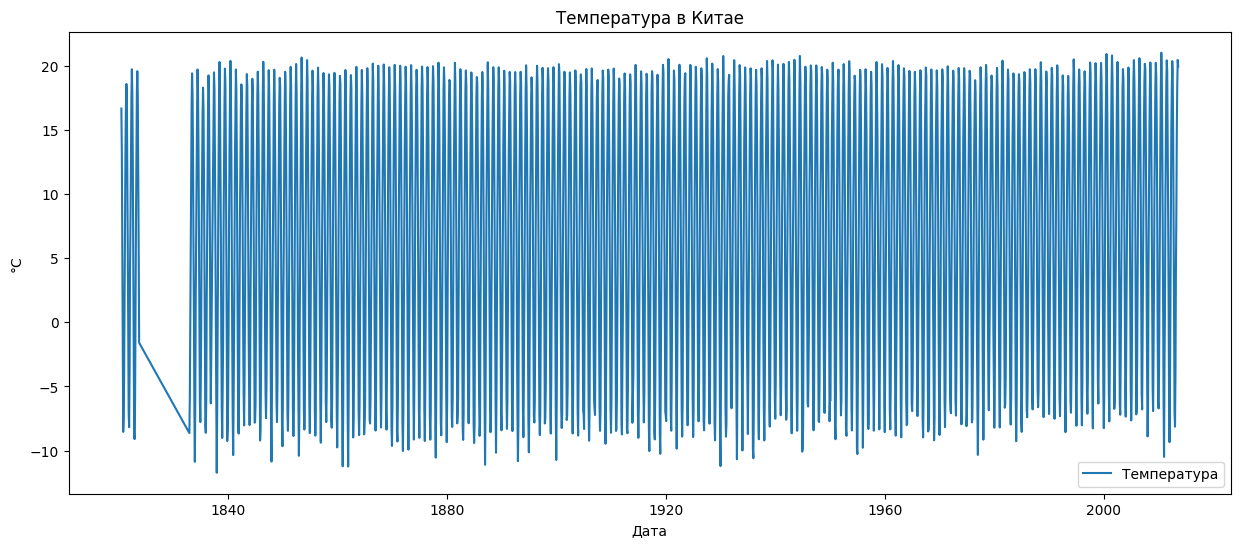

In [37]:
plt.figure(figsize=(15,6))
plt.plot(df_cn.dt, df_cn["AverageTemperature"], label="Температура")
plt.title("Температура в Китае")
plt.xlabel("Дата")
plt.ylabel("°C")
plt.legend()
plt.show()

Так как есть пириуед где не было замеров скорее всего из за того что в 1824–1832 годах Китай находился в состоянии упадка, характеризующегося усилением коррупции, экономическими трудностями и ростом социальной напряженности по этому данные взяты с 1833

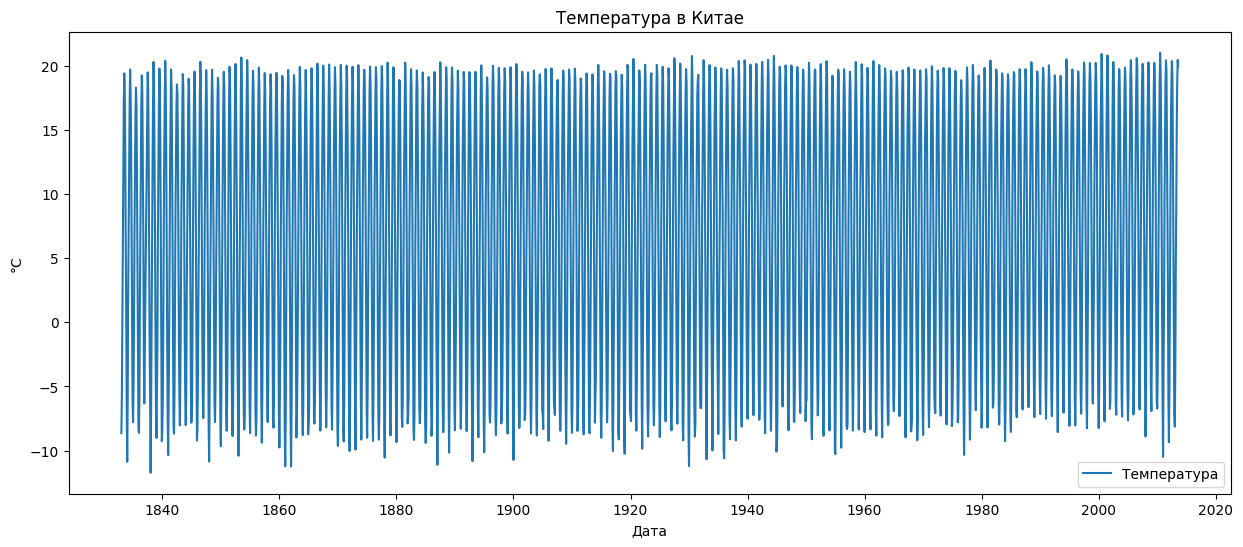

In [47]:
df_short = df_cn[df_cn.dt >= '1833-01-01']

plt.figure(figsize=(15,6))
plt.plot(df_short.dt, df_short["AverageTemperature"], label="Температура")
plt.title("Температура в Китае")
plt.xlabel("Дата")
plt.ylabel("°C")
plt.legend()
plt.show()